In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks
file_path = "/Users/anilp/Downloads/Nutrition-Summary-2023-09-20-to-2023-09-27.csv"
df = pd.read_csv('/Users/anilp/Downloads/Nutrition-Summary-2023-09-20-to-2023-09-27.csv')
df.head(5)

,Date,Meal,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron,Note
0,2023-09-20,Breakfast,421.5,13.7,2.7,0.1,0.0,0.0,0.0,38.3,422.4,62.0,5.4,20.9,16.5,5.0,17.1,0.6,1.7,NaN
1,2023-09-20,Dinner,767.0,27.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.6,0.0,0.0,50.6,0.0,0.0,0.0,0.0,NaN
2,2023-09-20,Lunch,1183.0,54.6,5.4,11.0,0.0,0.0,0.0,0.6,0.0,129.6,12.8,13.5,47.8,0.0,0.0,0.0,0.0,NaN
3,2023-09-20,Snacks,1142.8,64.5,12.0,0.0,0.0,0.3,12.2,128.0,684.4,64.1,6.6,17.5,84.3,0.0,116.2,290.0,15.1,NaN
4,2023-09-21,Breakfast,374.5,12.4,2.0,0.0,0.0,0.0,0.0,36.8,0.0,55.2,3.9,6.0,14.3,0.0,0.0,0.0,0.0,NaN


In [6]:
calories = df['Calories']

In [7]:
calories

0      421.5
1      767.0
2     1183.0
3     1142.8
4      374.5
5      864.0
6      909.5
7      990.8
8      600.4
9      950.0
10     614.5
11     905.3
12     701.0
13    1000.0
14    1138.3
15     590.0
16     790.0
17     860.0
18     888.1
19     576.9
20     462.3
21    1095.0
22     688.0
23    1057.8
24     445.0
25     842.0
26     321.0
27    1131.2
28     124.0
Name: Calories, dtype: float64

In [5]:
fat = df['Fat (g)']

In [6]:
fat

0     13.7
1     27.4
2     54.6
3     64.5
4     12.4
5     39.1
6     45.9
7     56.4
8     15.6
9     51.7
10    30.8
11    32.3
12    27.4
13    20.0
14    14.3
15     0.0
16    33.7
17    50.0
18    24.4
19    22.7
20    18.9
21    64.3
22    12.4
23    38.1
24    11.3
25    37.0
26    10.9
27    40.9
28     0.4
Name: Fat (g), dtype: float64

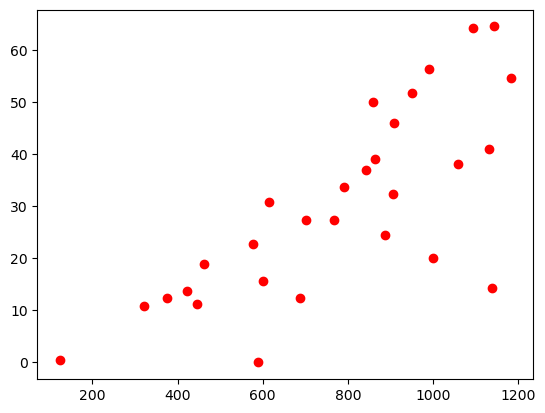

In [27]:
plt.scatter(calories,fat, c='red')
plt.show()

In [35]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [30]:
regr = linear_model.LinearRegression()

In [32]:
x = calories.values.reshape(-1,1)
y = fat.values.reshape(-1,1)
regr.fit(x,y)

LinearRegression()

In [33]:
predicted_y = regr.predict(x)

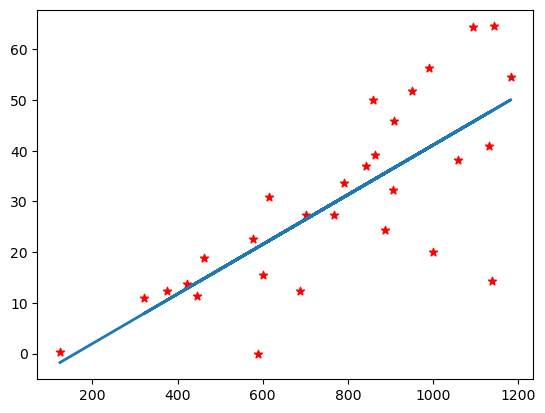

In [34]:
plt.scatter(calories, fat, c = 'red', marker ='*')
plt.plot(calories,predicted_y, linewidth='2')
plt.show()

In [38]:
fat.describe()

count    29.000000
mean     30.037931
std      18.204658
min       0.000000
25%      14.300000
50%      27.400000
75%      40.900000
max      64.500000
Name: Fat (g), dtype: float64

<Axes: xlabel='Fat (g)', ylabel='Count'>

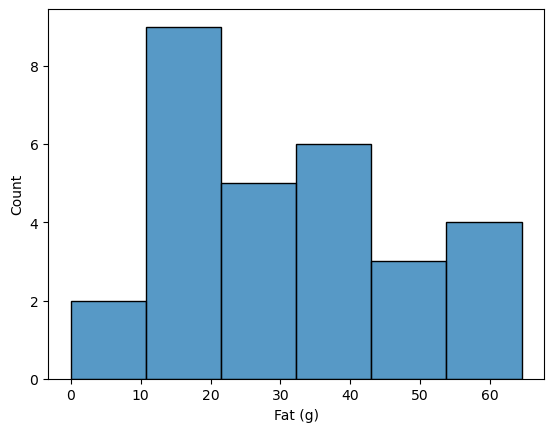

In [13]:
import seaborn as sns
sns.histplot(fat)

<Axes: xlabel='Fat (g)', ylabel='Count'>

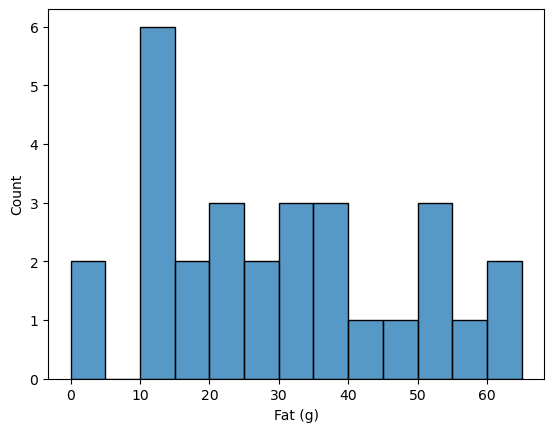

In [14]:
sns.histplot(fat,binwidth=5)

In [15]:
avg_fats=np.mean(fat)
med_fats=np.median(fat)

In [19]:
avg_fats

30.037931034482757

In [20]:
med_fats

27.4

<Axes: xlabel='Fat (g)'>

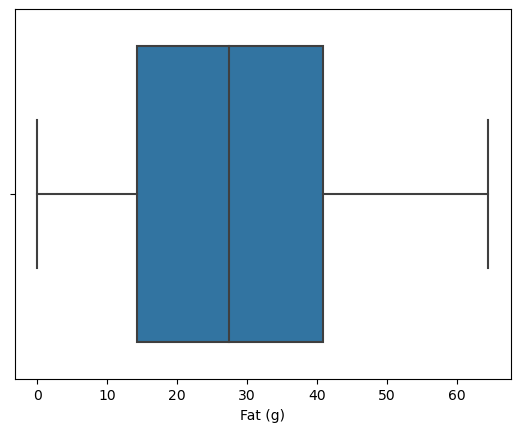

In [23]:
sns.boxplot(x=fat)

<Axes: xlabel='Fat (g)', ylabel='Count'>

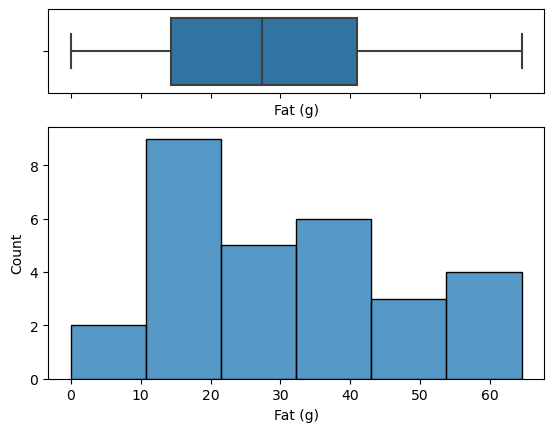

In [24]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(.25,.75)})
sns.boxplot(x=fat, ax = ax_box)
sns.histplot(x=fat, ax = ax_hist)

boxplot to find outliers/
histplot to see mean,median,%25,%75/
use skew and kurtosis to find std from histplot